# 通用教程简介(Introduction To ggplot2)  
以前，我们看到了使用ggplot2软件包制作图表的简短教程。它很快涉及制作ggplot的各个方面。现在，这是一个完整而完整的教程。现在讨论如何构造和自定义几乎所有ggplot。它涉及的原则，步骤和微妙之处，使图像的情节有效和更具视觉吸引力。因此，出于实用目的，我希望本教程可以作为书签参考，对您日常的绘图工作很有用。
这是ggplot2的三部分通用教程的第1部分，ggplot2是R中的美观（非常流行）的图形框架。该教程主要针对具有R编程语言的一些基本知识并希望制作复杂且美观的图表的用户与R ggplot2。
+ ggplot2简介(Introduction to ggplot2)
+ 自定义外观(Customizing the Look and Feel)
+ 前50个ggplot2可视化效果(top 50 ggplot2 Visualizations)

ggplot2简介涵盖了有关构建简单ggplot以及修改组件和外观的基本知识；自定义外观是关于图像的自定义，如使用多图，自定义布局操作图例、注释；前50个ggplot2可视化效果应用在第1部分和第2部分中学到的知识来构造其他类型的ggplot，例如条形图，箱形图等。

# 3 ggplot2入门笔记3—通用教程如何自定义ggplot2
在本教程中，我将讨论如何自定义一个情节的6个最重要美学的外观。总而言之，它提供了一个相当全面的列表，详细说明了如何完成自定义任务。该章节主要内容有：
1. 添加图和轴标题(Adding Plot and Axis Titles)
2. 修改图例(Modifying Legend)
3. 添加文本，标签和注释(Adding Text, Label and Annotation)
4. 翻转和反转X和Y轴(Flipping and Reversing X and Y Axis)
5. 分面：在一个图形中绘制多个图(Faceting: Draw multiple plots within one figure)
6. 修改图背景，长轴和短轴(Modifying Plot Background, Major and Minor Axis)

**参考文档**
> http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html

让我们从midwest数据集中的人口相对于面积的散点图开始。点的颜色和大小分别基于state（类别）和popdensity（连续）列而变化。我们已经在之前的ggplot2教程中做了类似的事情。下面的图表很好地包含了必要的组件，例如标题，轴标签和图例设置。但是如何修改外观？使用该theme()功能可以实现与外观有关的大多数要求。它接受大量参数。R控制台键入?theme，然后自己查看相关参数。

Warning message:
"package 'ggplot2' was built under R version 3.6.1"
Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


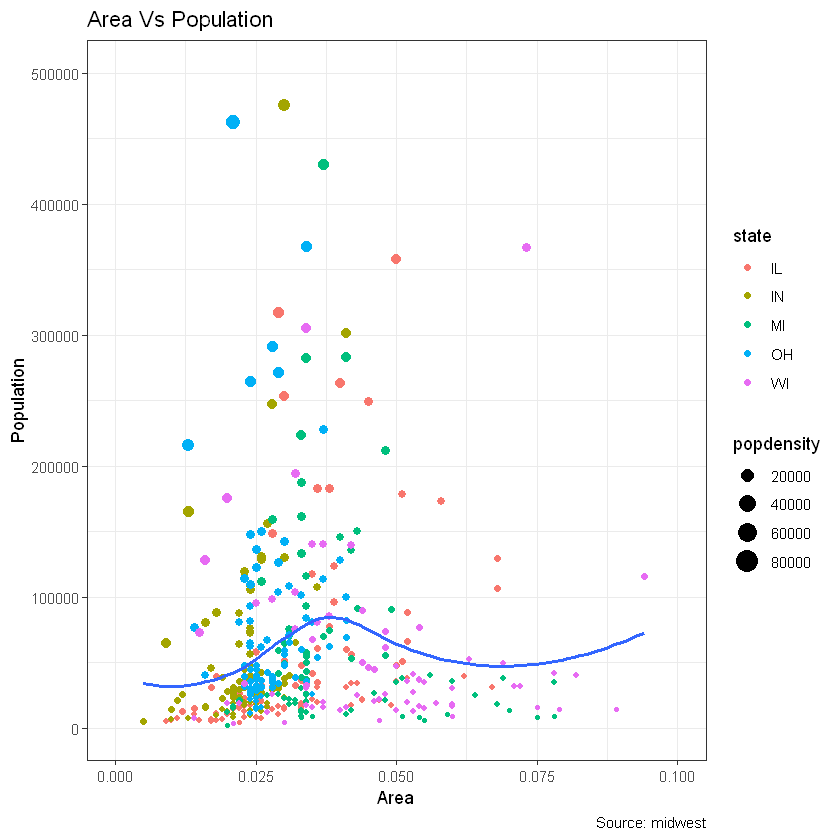

In [1]:
# Setup
options(scipen=999)
library(ggplot2)
data("midwest", package = "ggplot2")
theme_set(theme_bw())

# Add plot components --------------------------------
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# Call plot ------------------------------------------
plot(gg)

传递给theme()组件的参数需要使用特殊element_type()功能进行设置。它们有4种主要类型：
+ element_text()：由于标题，副标题是文本项，element_text()因此使用函数进行设置。
+ element_line()：同样element_line()用于修改基于线的组件，例如轴线，主要和次要网格线等。
+ element_rect()：修改矩形组件，例如绘图和面板背景。
+ element_blank()：关闭显示主题项目。

有关更多信息，请参见即将进行的讨论。让我们讨论许多与更改绘图输出有关的任务，从修改标题和轴文本开始。

## 1. 添加图和轴标题(Adding Plot and Axis Titles)  
绘图和轴标题以及轴文本是绘图主题的一部分。因此，可以使用theme()功能对其进行修改。该theme()函数接受上述四个element_type()函数之一作为参数。由于图和轴标题是文本组成部分，因此element_text()可用于对其进行修改。在下面，我更改了大小，颜色，面和线高。可以通过更改来旋转轴文本angle。

Warning message:
"package 'showtext' was built under R version 3.6.2"
Loading required package: sysfonts

Warning message:
"package 'sysfonts' was built under R version 3.6.2"
Loading required package: showtextdb

Warning message:
"package 'showtextdb' was built under R version 3.6.2"
'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code

'font.add()' is now renamed to 'font_add()'
The old version still works, but consider using the new function in future code

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


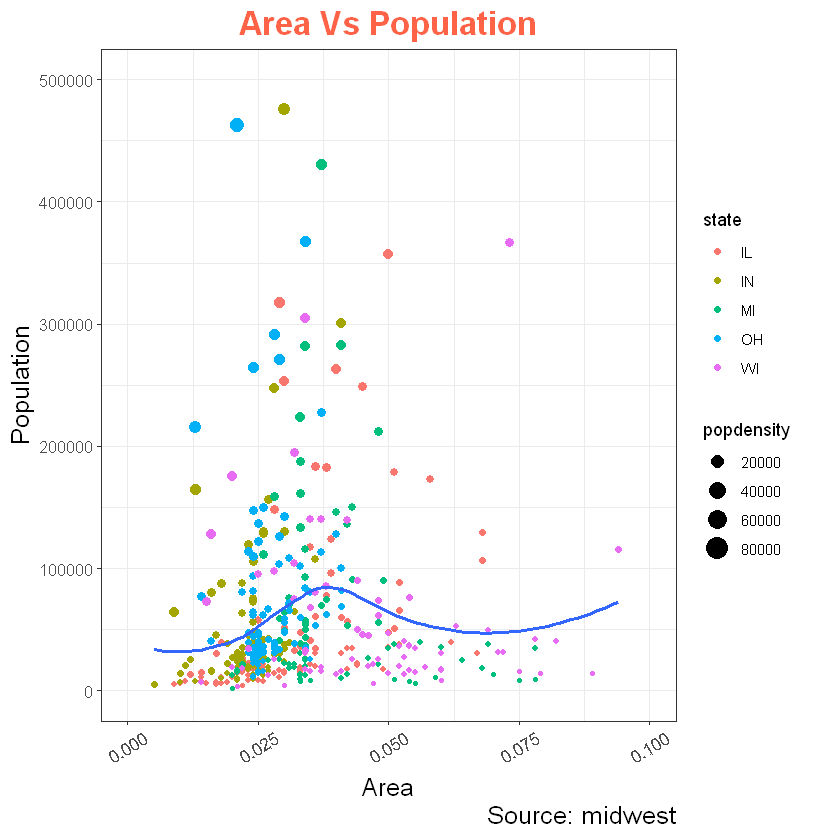

In [2]:
library(ggplot2)

# Base Plot 基础绘图
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

library(showtext)
showtext.auto(enable = TRUE)
# 添加字体
font.add('SimSun', 'simsun.ttc')

# Modify theme components 
# 修改主题
gg + theme(
    # 设置标题
    plot.title=element_text(size=20, # 字体大小
                            face="bold", # 字体加粗
                            family="SimSun", # 字体类型
                            color="tomato", # 字体颜色
                            hjust=0.5, # 标题离左边距距离
                            lineheight=1.2),  # 线条高度
    # 设置子标题
    plot.subtitle=element_text(size=15, # 字体大小
                               family="SimSun", # 字体类型
                               face="bold", # 字体加粗
                               hjust=0.5),  # 标题离左边距距离
    # caption 注释
    plot.caption=element_text(size=15),  
    # X axis title X轴标题
    axis.title.x=element_text(vjust=0,
                              size=15), 
    # Y axis title Y轴标题
    axis.title.y=element_text(size=15),
    # X axis text X轴文字
    axis.text.x=element_text(size=10,
                             angle = 30,
                             vjust=.5),
    # Y axis text Y轴文字
    axis.text.y=element_text(size=10))  

上面的示例涵盖了一些经常使用的主题修改，并且实际列表太长。如果要更改任何组件的外观，?theme这就是您要查看的第一处。比较常见参数如下：
+ vjust，控制标题（或标签）和绘图之间的垂直间距。
+ hjust，控制水平间距。将其设置为0.5可使标题居中。
+ family，用于设置新字体
+ face，设置字体(“plain”, “italic”, “bold”, “bold.italic”)

## 2. 修改图例(Modifying Legend)
无论何时将绘图的几何图形(如点、线、条等)设置为基于另一列更改美学(填充、大小、列、形状或描边)，如geom_point(aes(ol=state，size=popensity))，都会自动绘制图例。如果要创建美学不变的几何图形，则默认情况下不会绘制图例。在这种情况下，您可能需要手动创建自己的图例。以下示例适用于自动创建图例的情况。  
本节主要内容有：
+ 如何更改图例标题(How to Change the Legend Title)
+ 如何更改类别的图例标签和点颜色(How to Change Legend Labels and Point Colors for Categories)
+ 更改图例顺序(Change the Order of Legend)
+ 如何设置图例标题、文本和键的样式(How to Style the Legend Title, Text and Key)
+ 如何删除图例和更改图例位置(How to Remove the Legend and Change Legend Positions)

### 2.1 如何更改图例标题(How to Change the Legend Title)
现在让我们更改图例标题。我们有两个图例，颜色和大小。大小基于连续变量，而颜色基于分类（离散）变量。有3种方法可以更改图例标题。

**方法1：使用 labs()**

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


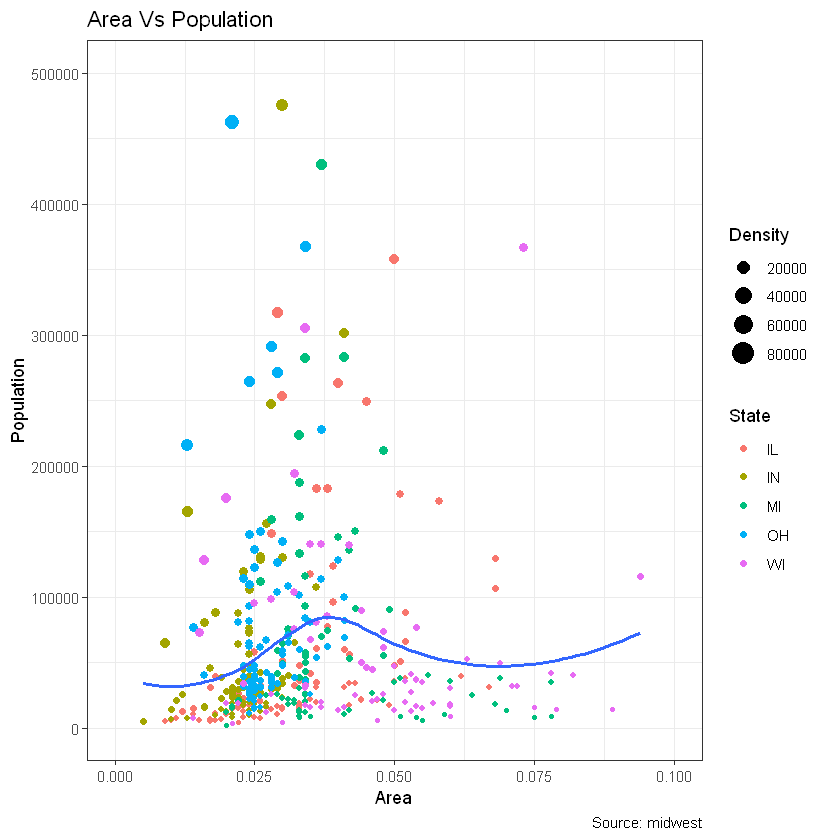

In [3]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# modify legend title
# 单独调用labs修改颜色和字体
gg + labs(color="State", size="Density")  

**方法2：使用 guides()**

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


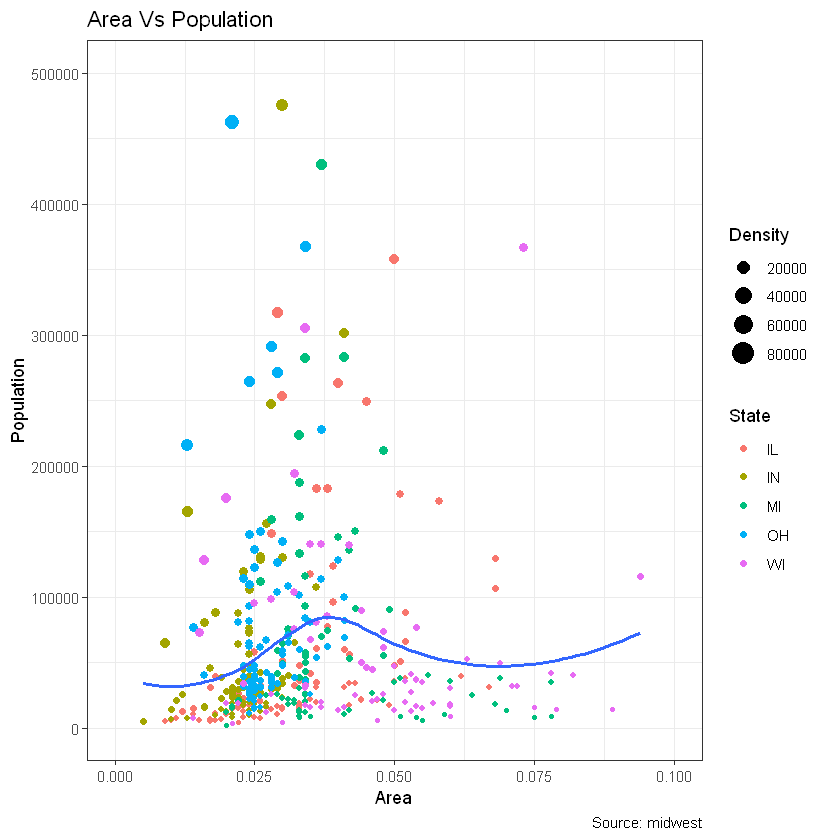

In [4]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# modify legend title
# 修改legend
gg <- gg + guides(color=guide_legend("State"), size=guide_legend("Density"))
plot(gg)

**方法3：使用scale_aesthetic_vartype()格式**  
scale_estheic_vartype()的格式允许您关闭一种特定美学的图例，而保留其余部分。这只需设置GUIDE=FALSE即可。例如，如果图例用于基于连续变量的点大小，则SCALE_SIZE_CONTINUOUE()函数将是正确的。如果您有形状图例并且基于分类变量，您能猜出要使用什么功能吗？

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


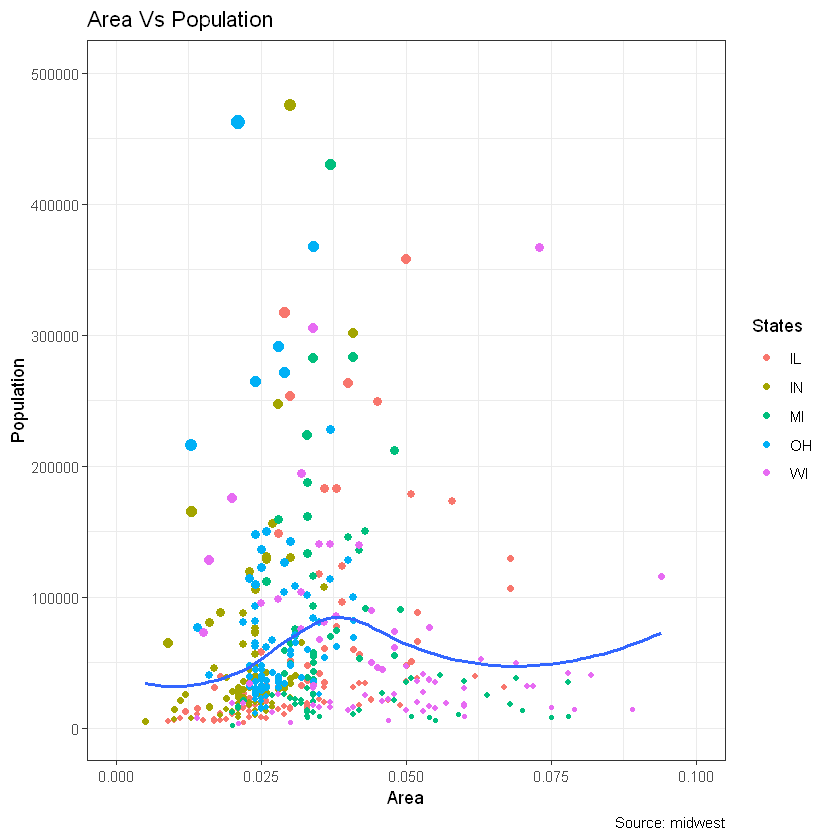

In [5]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# Modify Legend 修改图例
# guide = FALSE turn off legend for size 关闭size的图例
# scale_color_discrete(name="States") 设置离散颜色变量的图例
gg + scale_color_discrete(name="States") + scale_size_continuous(name = "Density", guide = FALSE)  

### 2.2 如何更改类别的图例标签和点颜色(How to Change Legend Labels and Point Colors for Categories)
可以使用相应的scale_aesthetic_manual()功能来完成。新的图例标签将作为字符向量提供给自labels变量。如果要更改类别的颜色，可以将其分配给自values变量，如下例所示：

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


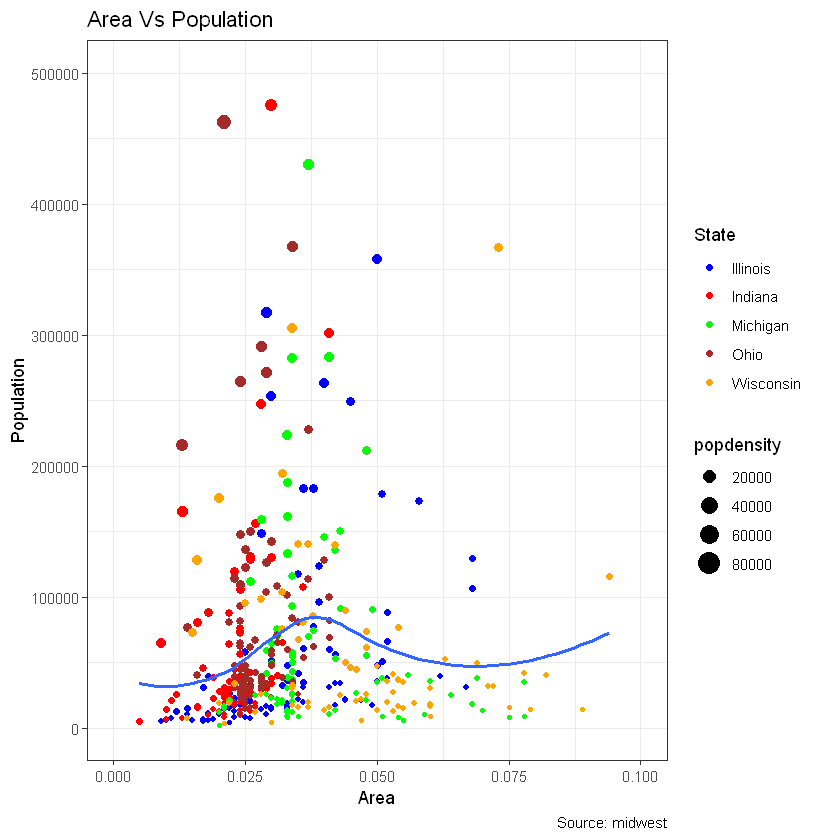

In [6]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

gg + scale_color_manual(name="State", 
                        # 设置标签
                        labels = c("Illinois", 
                                   "Indiana", 
                                   "Michigan", 
                                   "Ohio", 
                                   "Wisconsin"), 
                        # 设置标签对应的颜色
                        values = c("IL"="blue", 
                                   "IN"="red", 
                                   "MI"="green", 
                                   "OH"="brown", 
                                   "WI"="orange"))

### 2.3 更改图例顺序(Change the Order of Legend)
如果要在大小（密度）之前显示颜色（状态）的图例，可以使用guides（）函数完成。图例的顺序order 必须根据需要设置。如果要更改图例中标签的位置，请按照上一示例中所示的要求顺序进行设置。

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


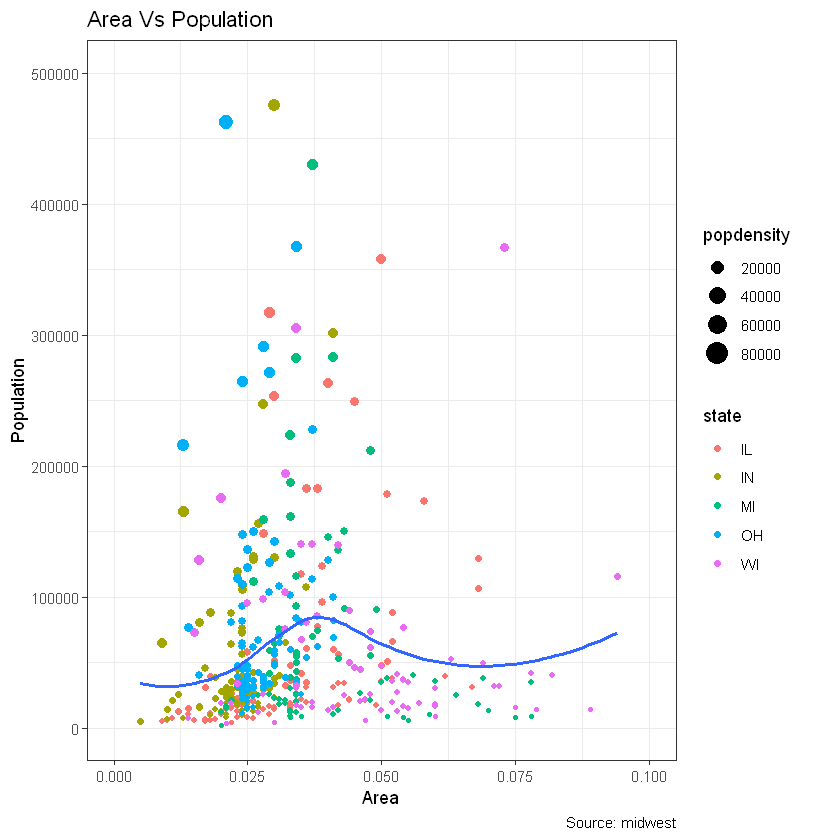

In [7]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# order设置位置顺序
gg + guides(colour = guide_legend(order = 2), size = guide_legend(order = 1))

### 2.4 如何设置图例标题、文本和键的样式(How to Style the Legend Title, Text and Key)
图例标题，文本，键和指南的样式也可以调整。图例的键是一个类似元素的图形，因此必须使用element_rect()功能进行设置。

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


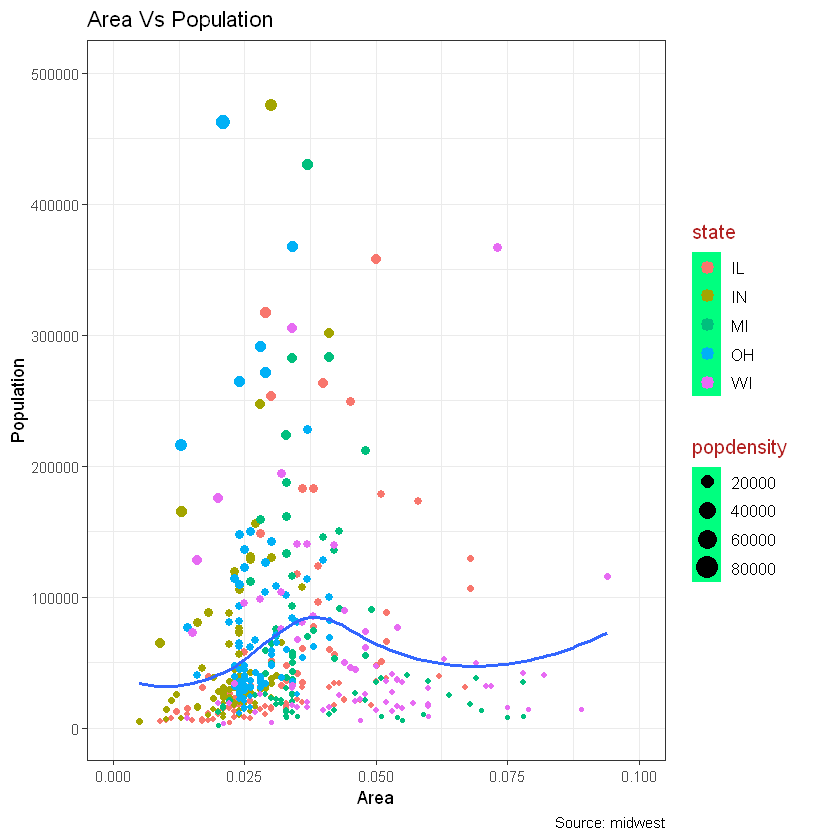

In [8]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

gg + theme(
    # 设置图例标题字体颜色和大小
    legend.title = element_text(size=12, color = "firebrick"), 
    # 设置图例内容文字大小
    legend.text = element_text(size=10),
    # 设置背景色
    legend.key=element_rect(fill='springgreen')) +
# 设置内部图例圆圈大小和间距
guides(colour = guide_legend(override.aes = list(size=2, stroke=1.5))) 

### 2.5 如何删除图例和更改图例位置(How to Remove the Legend and Change Legend Positions)
图像在情节中的位置是theme的一个方面。因此可以使用theme（）函数对其进行修改。如果要将图例放置在绘图中，还可以使用legend.justification控制图例的铰点。Legend.position是图表区域中的x轴和y轴位置，其中(0，0)是图表的左下角，(1，1)是右上角。同样，legend.justification是指图例内部的铰链点。

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


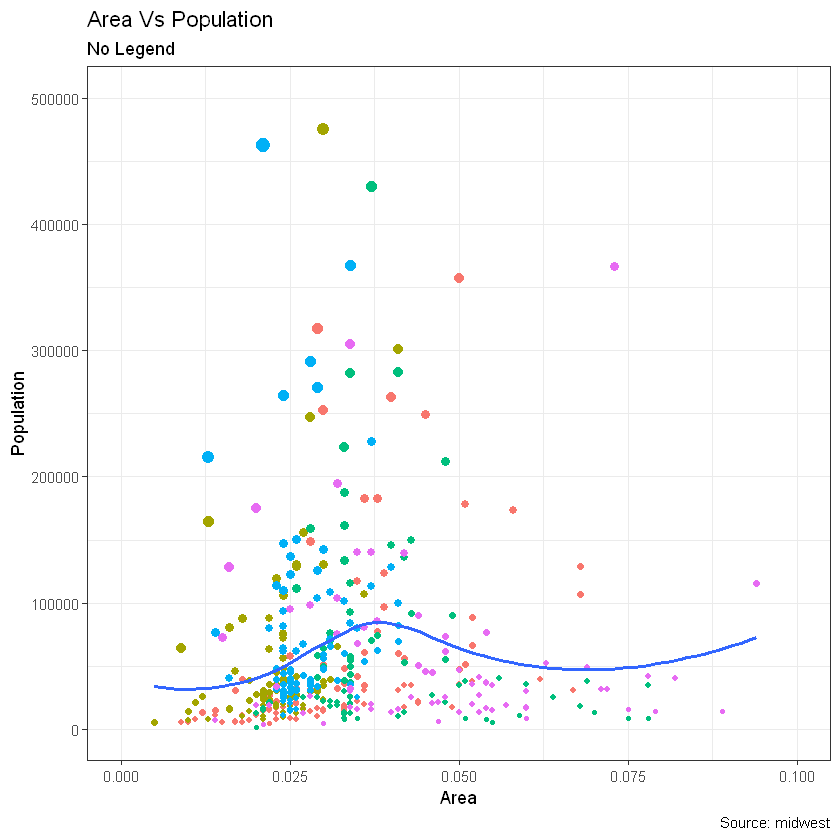

In [9]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# No legend 
# 无图例
gg + theme(legend.position="None") + labs(subtitle="No Legend")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


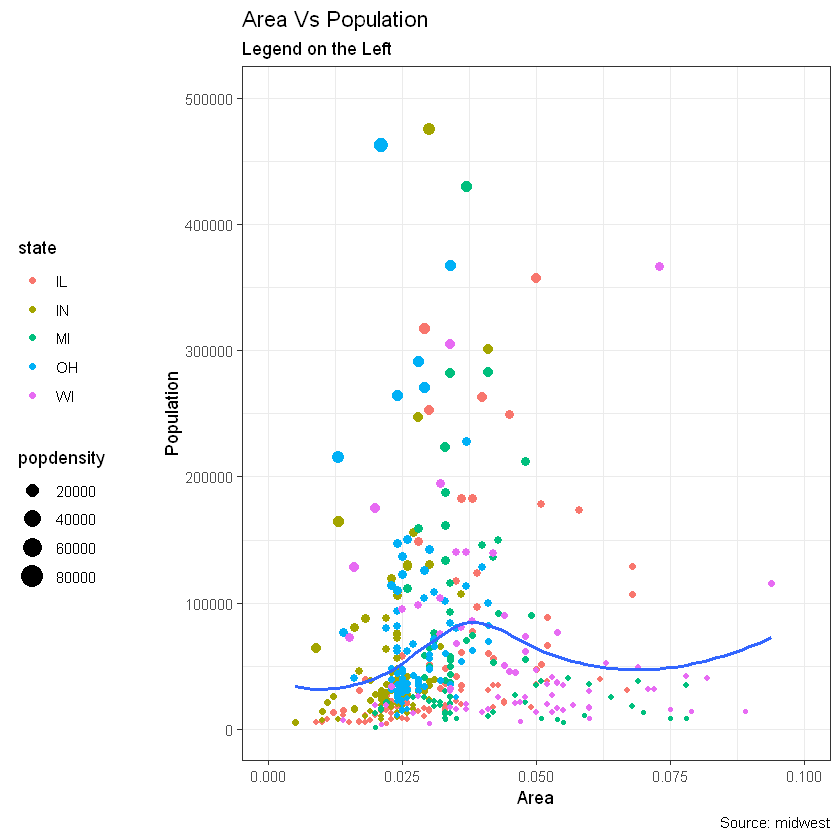

In [10]:
# Legend to the left 图例位置在左边
gg + theme(legend.position="left") + labs(subtitle="Legend on the Left")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


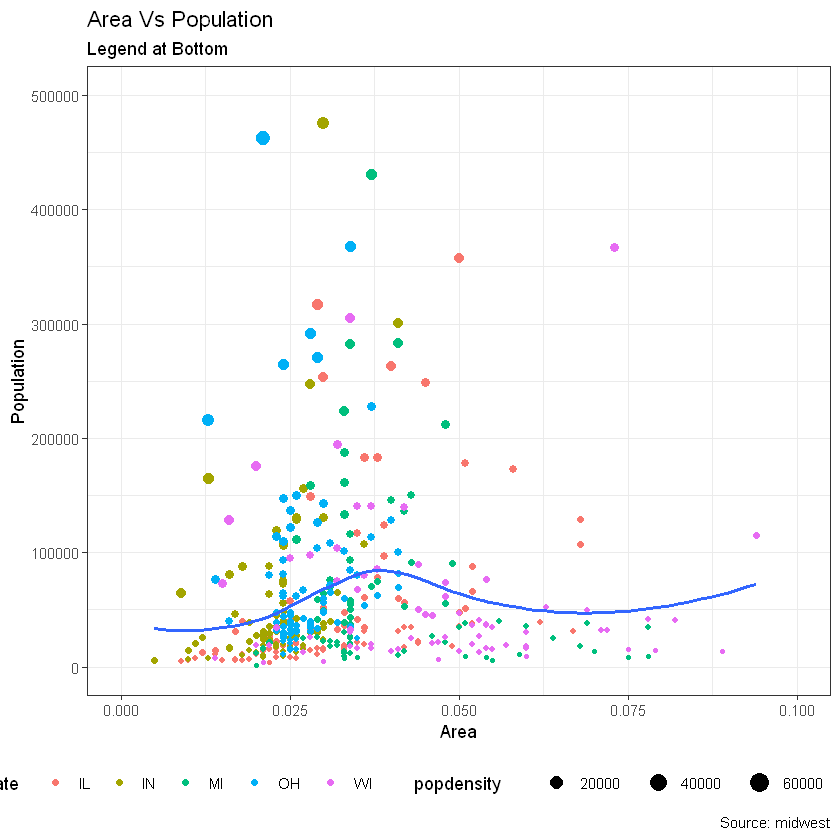

In [11]:
# legend at the bottom and horizontal
# 图例位于图像底部，图例水平摆放
gg + theme(legend.position="bottom", legend.box = "horizontal") + labs(subtitle="Legend at Bottom")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


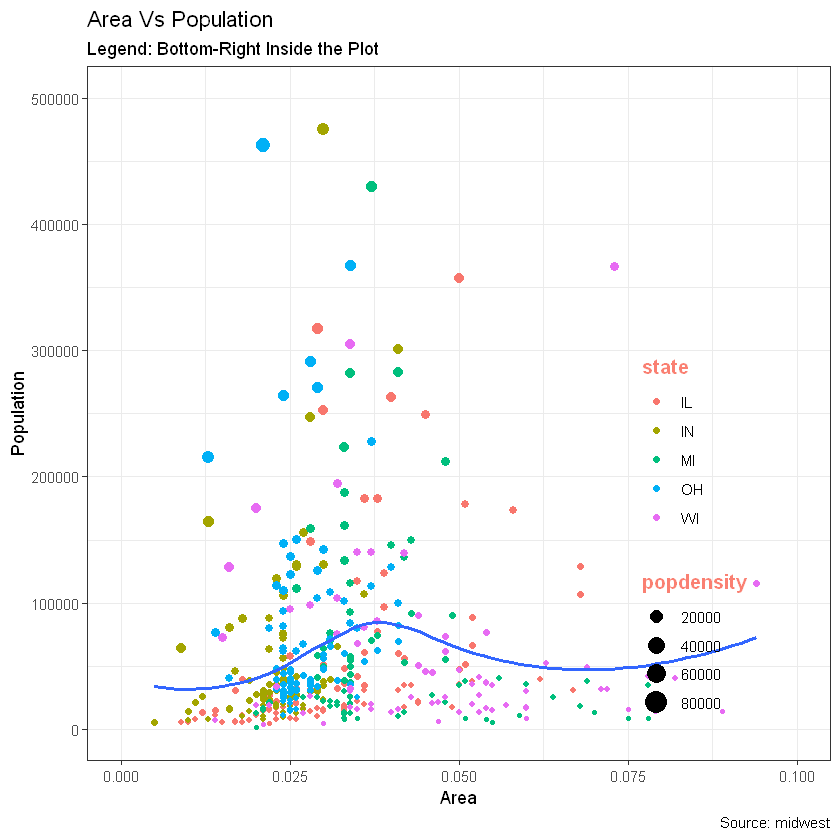

In [12]:
# legend at bottom-right, inside the plot
# 图例位于图像内部右下角
gg + theme(
    # 设置图像标题
    legend.title = element_text(size=12, color = "salmon", face="bold"),
    # 设置图像铰点为图内左下角
    legend.justification=c(1,0), 
    # 图例位置
    legend.position=c(0.95, 0.05), 
    # 图例背景
    legend.background = element_blank(),
    # 图例填充颜色
    legend.key = element_blank()) + 
labs(subtitle="Legend: Bottom-Right Inside the Plot")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


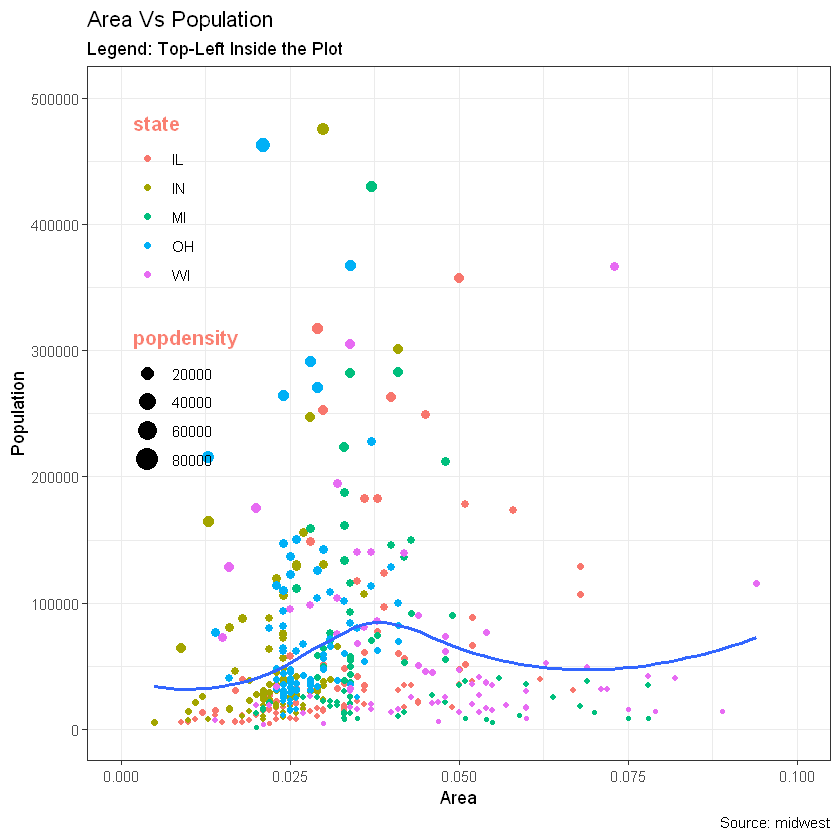

In [13]:
# legend at top-left, inside the plot 
# 图例位于图像内部左上角
gg + theme(
    # 设置标题名
    legend.title = element_text(size=12, color = "salmon", face="bold"),
    # 设置图像铰点为图内右上角
    legend.justification=c(0,1), 
    legend.position=c(0.05, 0.95),
    legend.background = element_blank(),
    legend.key = element_blank()) + 
labs(subtitle="Legend: Top-Left Inside the Plot")

## 3. 添加文本，标签和注释(Adding Text, Label and Annotation)
本节主要内容有：
+ 如何在点周围添加文本和标签(How to Add Text and Label around the Points)
+ 如何在绘图中的任何地方添加注释(How to Add Annotations Anywhere inside Plot)

### 3.1 如何在点周围添加文本和标签(How to Add Text and Label around the Points)
让我们试着添加一些文本。我们将只向人口超过40万的县添加文本。为了实现这一点，我创建了另一个子集数据框（中西部子数据框），其中只包含符合上述条件的县。然后用这个新的数据框作为数据源绘制geom文本和geom标签。这将确保仅为新数据帧中包含的点添加标签（geom label）。

In [14]:
library(ggplot2)

# Filter required rows.
# 获取数据
midwest_sub <- midwest[midwest$poptotal > 300000, ]
midwest_sub$large_county <- ifelse(midwest_sub$poptotal > 300000, midwest_sub$county, "")

# Base Plot
# 基础绘图
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."
Warning message:
"Removed 14 rows containing missing values (geom_text)."


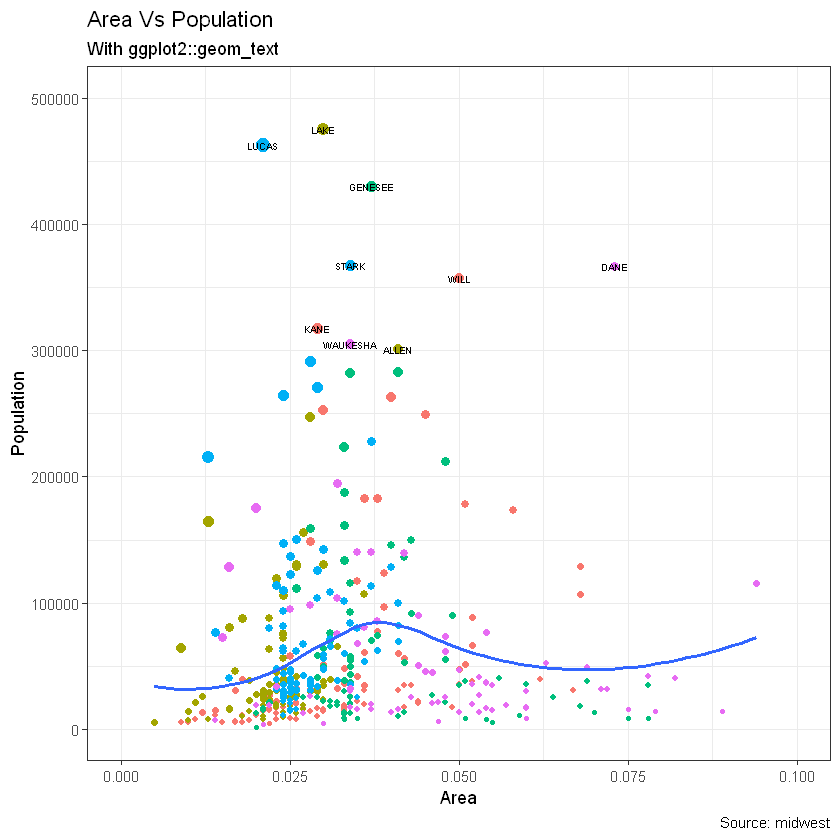

In [15]:
# Plot text and label
# 添加标签
gg + geom_text(aes(label=large_county), size=2, data=midwest_sub) + 
# 小标题
labs(subtitle="With ggplot2::geom_text") + 
# 无图例
theme(legend.position = "None")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."
Warning message:
"Removed 14 rows containing missing values (geom_label)."


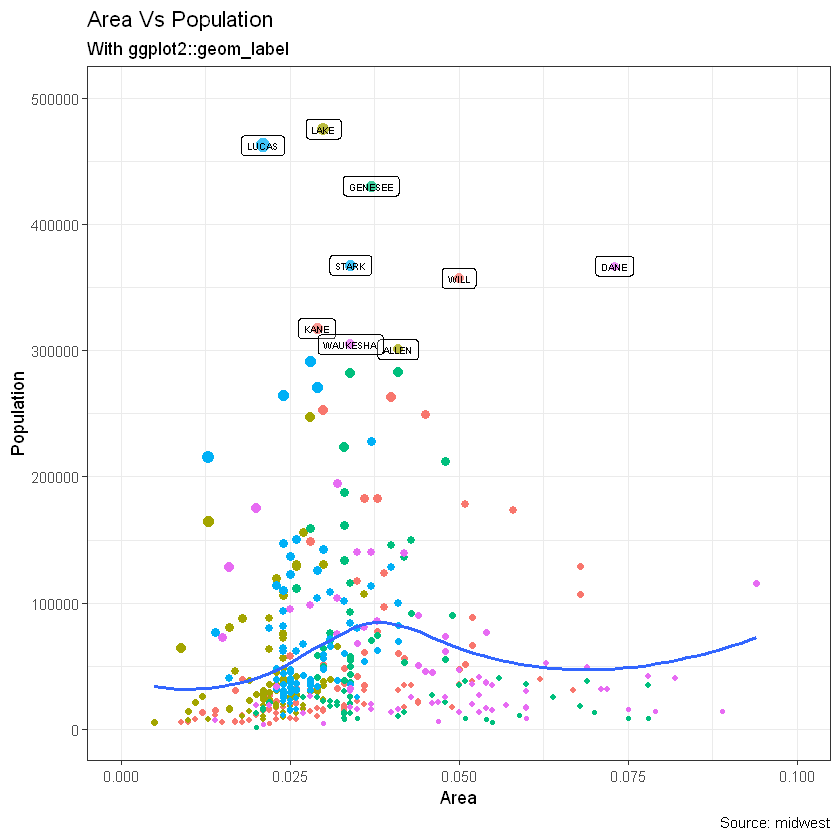

In [16]:
# 添加标签和透明度
gg + geom_label(aes(label=large_county), size=2, data=midwest_sub, alpha=0.25) + 
labs(subtitle="With ggplot2::geom_label") + 
theme(legend.position = "None")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."
Warning message:
"Removed 14 rows containing missing values (geom_text_repel)."


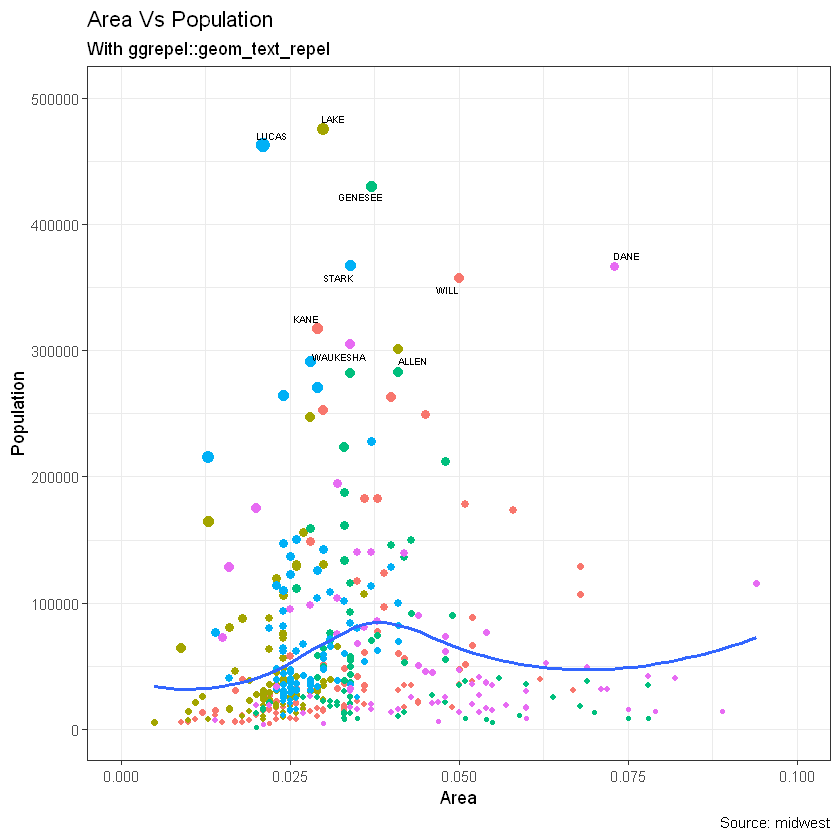

In [17]:
library(ggrepel)
# 调用ggrepel库添加标签
gg + geom_text_repel(aes(label=large_county), size=2, data=midwest_sub) + 
labs(subtitle="With ggrepel::geom_text_repel") + theme(legend.position = "None")

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."
Warning message:
"Removed 14 rows containing missing values (geom_label_repel)."


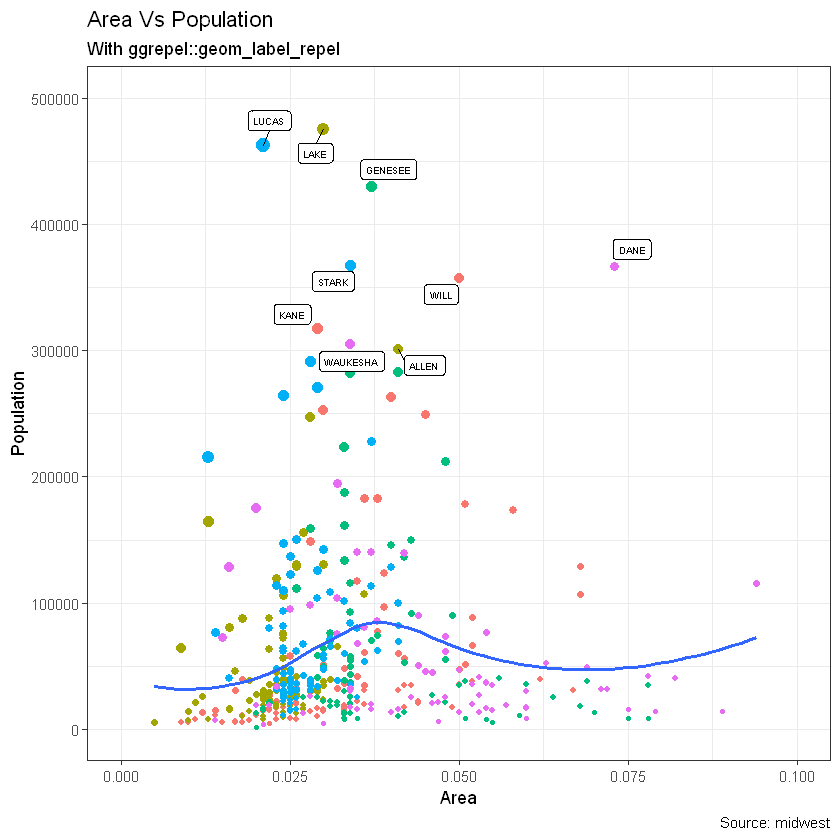

In [18]:
gg + geom_label_repel(aes(label=large_county), size=2, data=midwest_sub) + 
labs(subtitle="With ggrepel::geom_label_repel") + theme(legend.position = "None")   # label

### 3.2 如何在绘图中的任何地方添加注释(How to Add Annotations Anywhere inside Plot)
让我们看看如何向图表的任何特定点添加批注。它可以使用annotation_custom()函数完成，该函数接受grob作为参数。所以，让我们创建一个grob来保存您想要使用grid包显示的文本。

In [19]:
library(ggplot2)

# Base Plot
# 基础绘图
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# Define and add annotation
library(grid)
#文本
my_text <- "This text is at x=0.7 and y=0.8!"
#my_grob = grid.text(my_text, x=0.7 and y=0.8, gp=gpar(col="firebrick", fontsize=14, fontface="bold"))
#gg + annotation_custom(my_grob)

## 4. 翻转和反转X和Y轴(Flipping and Reversing X and Y Axis)
本节主要内容有：
+ 如何翻转X和Y轴？(How to flip the X and Y axis?)
+ 如何反转轴？(How to reverse the scale of an axis?)

### 4.1 如何翻转X和Y轴？(How to flip the X and Y axis?)
只需添加即可coord_flip()。

Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


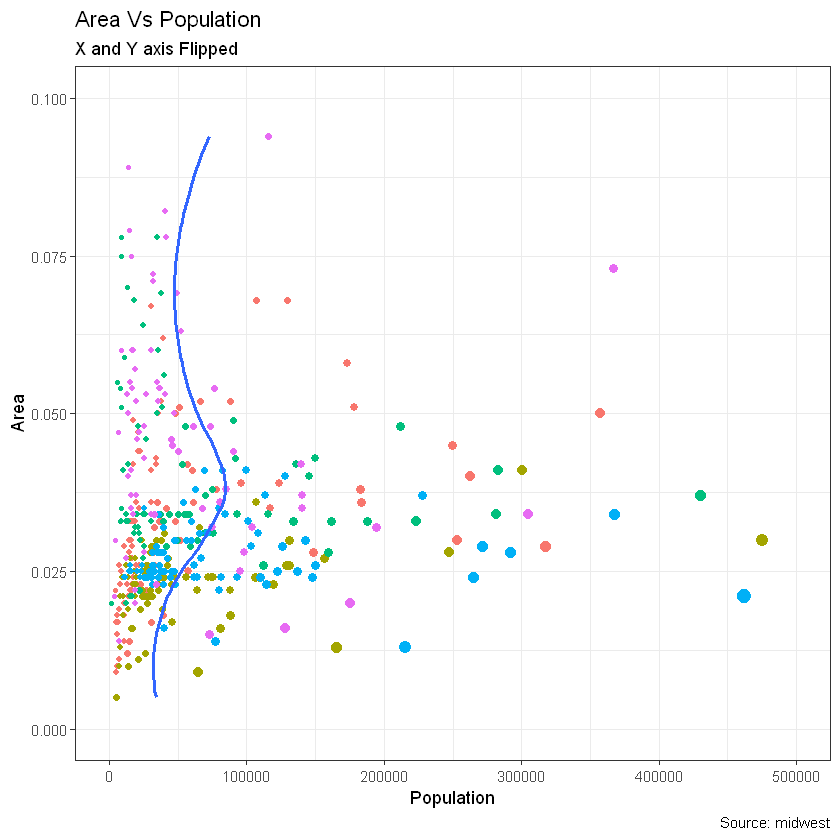

In [20]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest", subtitle="X and Y axis Flipped") + 
theme(legend.position = "None")

# Flip the X and Y axis -------------------------------------------------
# 翻转X和Y轴
gg + coord_flip()

### 4.2 如何反转轴？(How to reverse the scale of an axis?)
这很简单。使用scale_x_reverse()反转X轴和scale_y_reverse()反转Y轴。

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



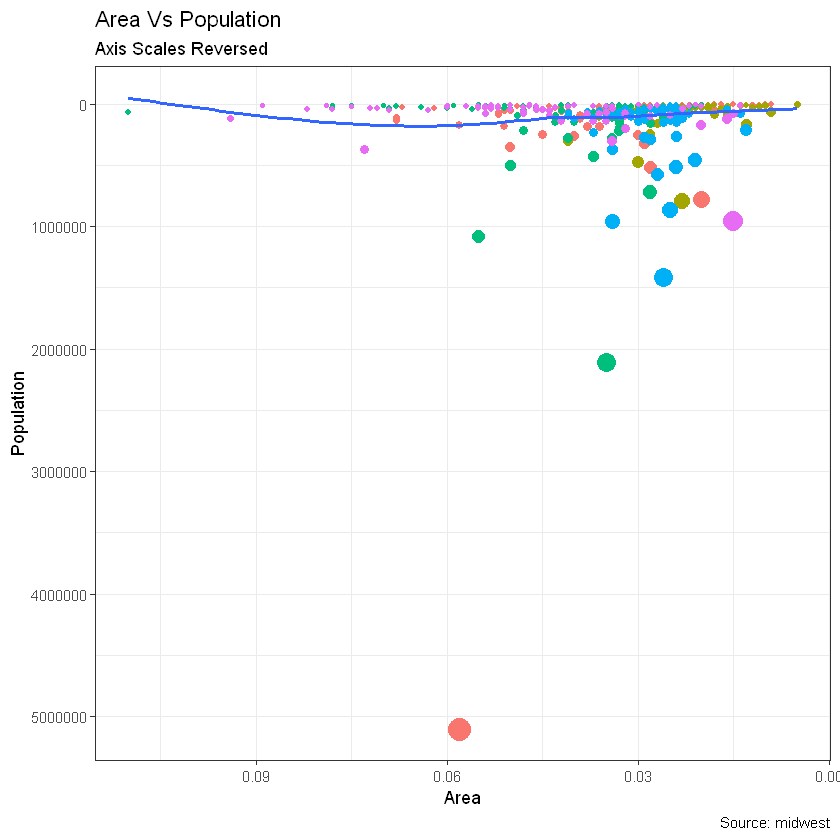

In [21]:
library(ggplot2)

# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
geom_point(aes(col=state, size=popdensity)) + 
geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest", subtitle="Axis Scales Reversed") + 
theme(legend.position = "None")

# Reverse the X and Y Axis ---------------------------
# 反转X轴和Y轴
gg + scale_x_reverse() + scale_y_reverse()

## 5. 分面：在一个图形中绘制多个图(Faceting: Draw multiple plots within one figure)
让我们对此使用mpg数据集，它位于ggplot2包中。

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


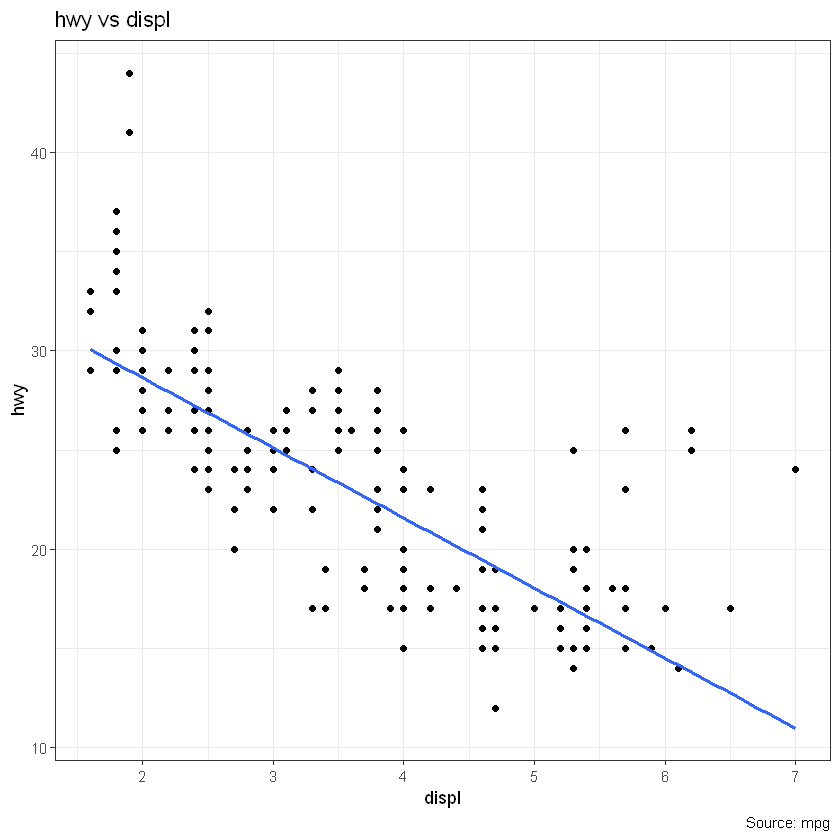

In [22]:
library(ggplot2)
# 载入数据
data(mpg, package="ggplot2")
# 展示数据
head(mpg)
# 画图
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
geom_point() + 
labs(title="hwy vs displ", caption = "Source: mpg") +
geom_smooth(method="lm", se=FALSE) + 
theme_bw()
plot(g)

对于整个数据集，我们有一个简单的公路行驶里程(hwy)与发动机排量的图表(displ)。但是，如果您想研究这种关系对于不同类型的车辆如何变化？本文具体介绍以下两种分面方式：
+ Facet Wrap 
+ Facet Grid

### 5.1 Facet Wrap
facet_wrap()用于针对各个类别将一个大图分解为多个小图。它以公式为主要参数。~左边的项目形成行，右边的项目形成列。默认情况下，所有的图在x轴和y轴上共享相同的标度。您可以通过设置scales=“free”来释放它们，但这样就很难在组之间进行比较。

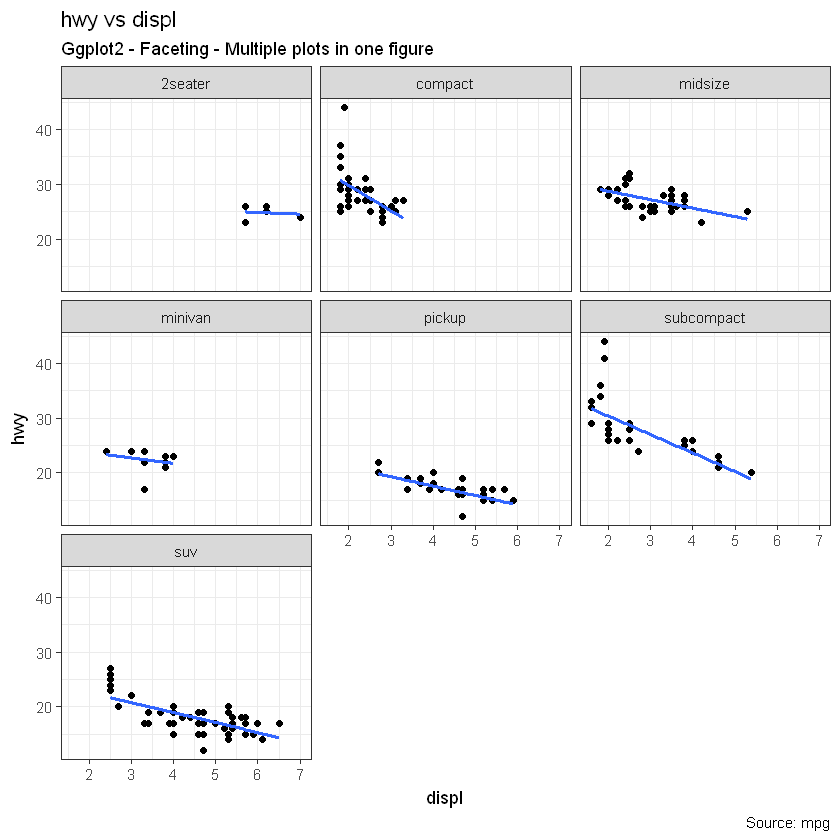

In [23]:
library(ggplot2)

# Base Plot
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
      geom_point() + 
      geom_smooth(method="lm", se=FALSE) + 
      theme_bw()

# Facet wrap with common scales
# 分面
# 以为class为列，分为3行
g + facet_wrap( ~ class, nrow=3) + 
# 共享标尺
labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Faceting - Multiple plots in one figure")

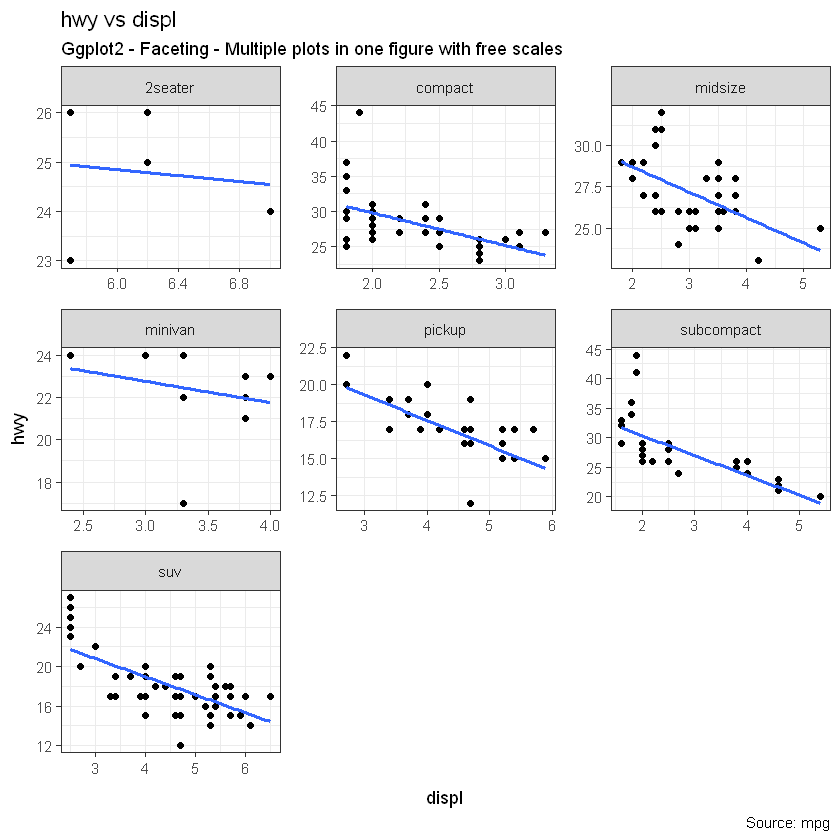

In [24]:
# Facet wrap with free scales
# 以列作为分块
g + facet_wrap( ~ class, scales = "free") + 
labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Faceting - Multiple plots in one figure with free scales")

那么，您从中得出什么呢？首先，大多数2座汽车的发动机排量较高，而小型货车和紧凑型汽车的排量较低。从沿X轴放置点的位置可以明显看出这一点。另外，随着发动机排量的增加，高速公路里程在所有路段上均下降。在小型和超小型车辆中，这种下降似乎更为明显。

### 5.2 Facet Grid
中间行和底部行的标题占据了相当大的空间。facet_grid()将去掉它，并为图表提供更多的区域。facet_grid的主要区别在于不能选择网格中的行数和列数。好了，让我们创建一个网格以查看其随制造商的变化。

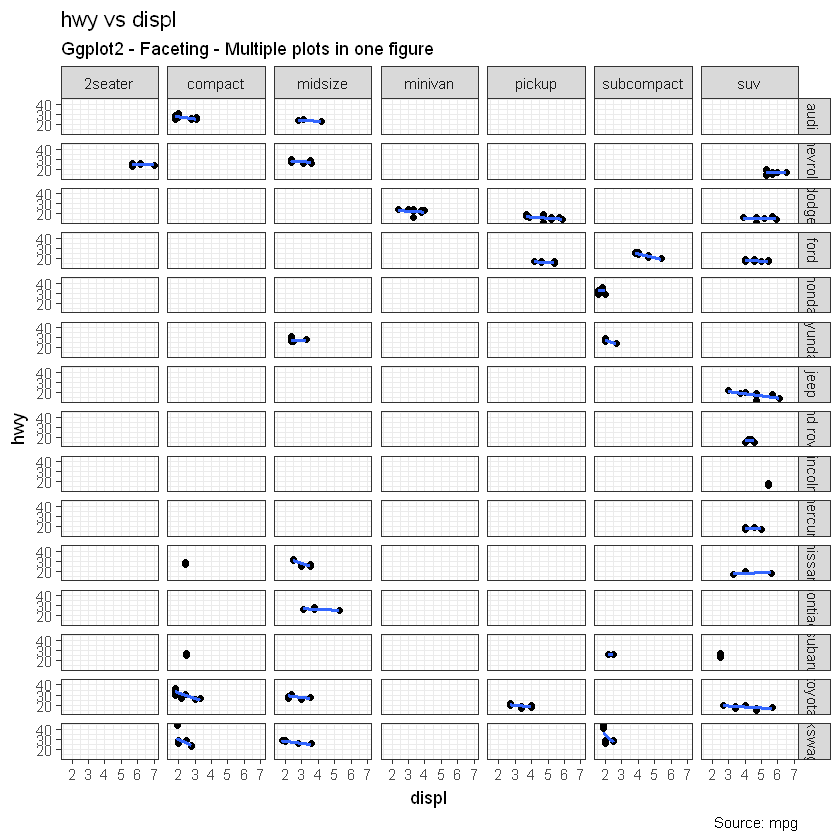

In [25]:
library(ggplot2)

# Base Plot
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
geom_point() + 
labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Faceting - Multiple plots in one figure") +
geom_smooth(method="lm", se=FALSE) + 
theme_bw()
# Add Facet Grid
# manufacturer in rows and class in columns
# 添加分面，列为class，行为manufacturer
g1 <- g + facet_grid(manufacturer ~ class)  
plot(g1)

好吧，让我们创建一个网格，看看它是如何随cylinder而变化的。

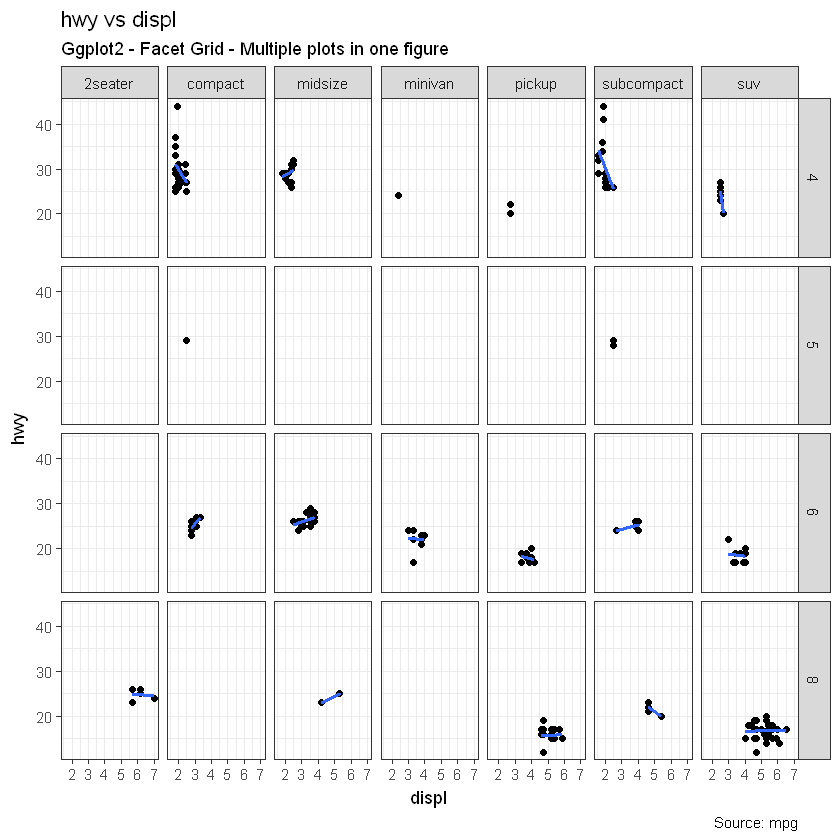

In [26]:
library(ggplot2)

# Base Plot
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
geom_point() + 
geom_smooth(method="lm", se=FALSE) + 
labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Facet Grid - Multiple plots in one figure") +
theme_bw()

# Add Facet Grid
# cyl in rows and class in columns.
g2 <- g + facet_grid(cyl ~ class)  
plot(g2)

很好，可以在示例面板中同时布局这两个图表，但我更喜欢gridExtra（）包。

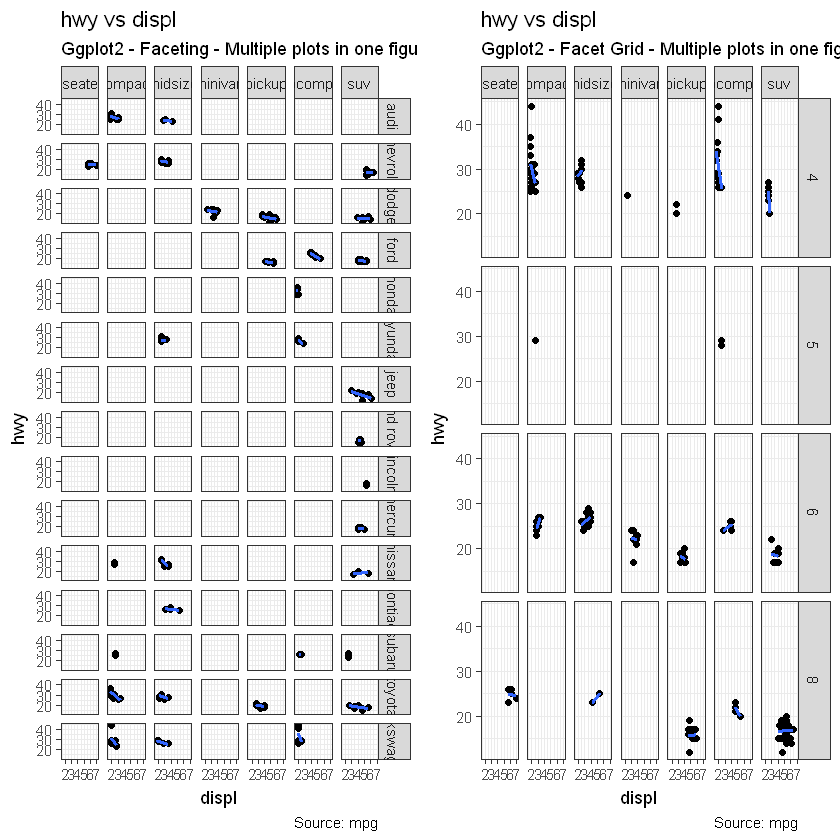

In [27]:
# Draw Multiple plots in same figure.
library(gridExtra)
gridExtra::grid.arrange(g1, g2, ncol=2)

## 6. 修改图背景，长轴和短轴(Modifying Plot Background, Major and Minor Axis)
本节主要内容有:
+ 如何更改绘图背景(How to Change Plot background)
+ 如何删除主要和次要网格，更改边框，轴标题，文本和标题(How to Remove Major and Minor Grid, Change Border, Axis Title, Text and Ticks)
+ 主题组件的继承结构(Inheritance Structure of Theme Components)

### 6.1 如何更改绘图背景(How to Change Plot background)

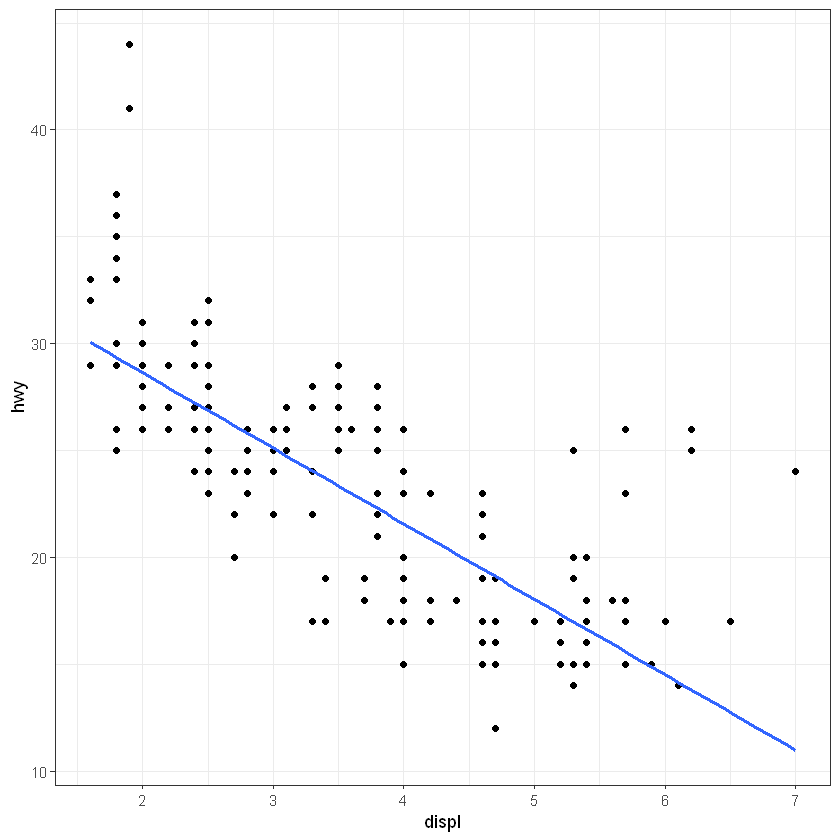

In [28]:
library(ggplot2)

# Base Plot
# 基础绘图
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
geom_point() + 
geom_smooth(method="lm", se=FALSE) + 
theme_bw()  
g

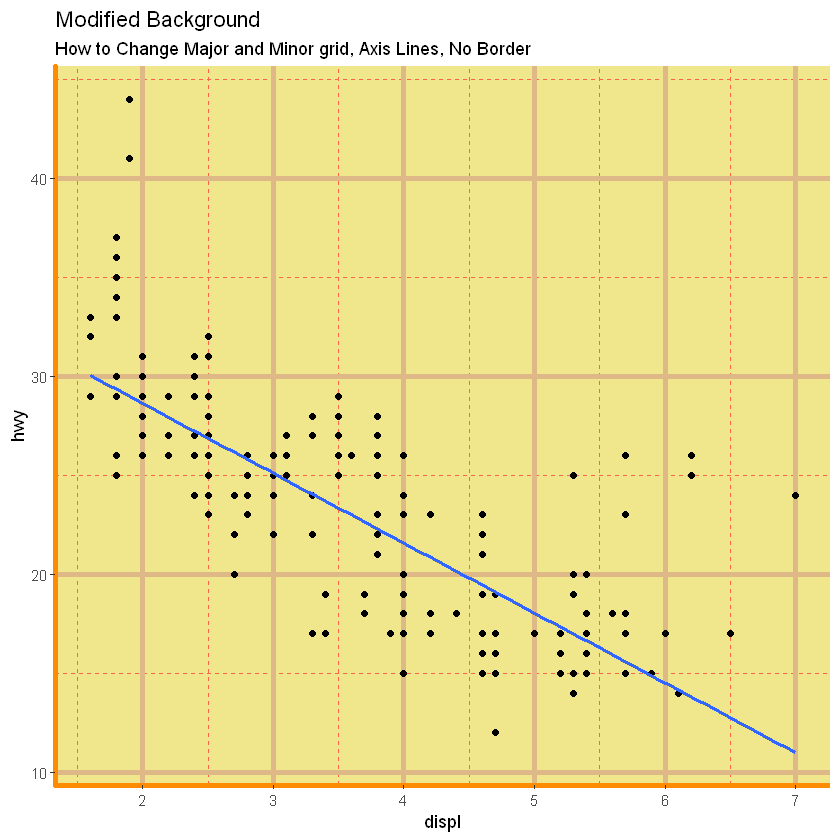

In [29]:
# Change Plot Background elements
# 改变图像背景
g + theme(
    # 设置背景色
    panel.background = element_rect(fill = 'khaki'),
    # 设置图像网格主间隔
    panel.grid.major = element_line(colour = "burlywood", size=1.5),
    # 设置图像网格次间隔
    panel.grid.minor = element_line(colour = "tomato", size=.25, linetype = "dashed"),
    # 设置图像边缘
    panel.border = element_blank(),
    # x轴颜色宽度
    axis.line.x = element_line(colour = "darkorange", size=1.5, lineend = "butt"),
    # y轴颜色宽度
    axis.line.y = element_line(colour = "darkorange", size=1.5)) +
labs(title="Modified Background", subtitle="How to Change Major and Minor grid, Axis Lines, No Border")

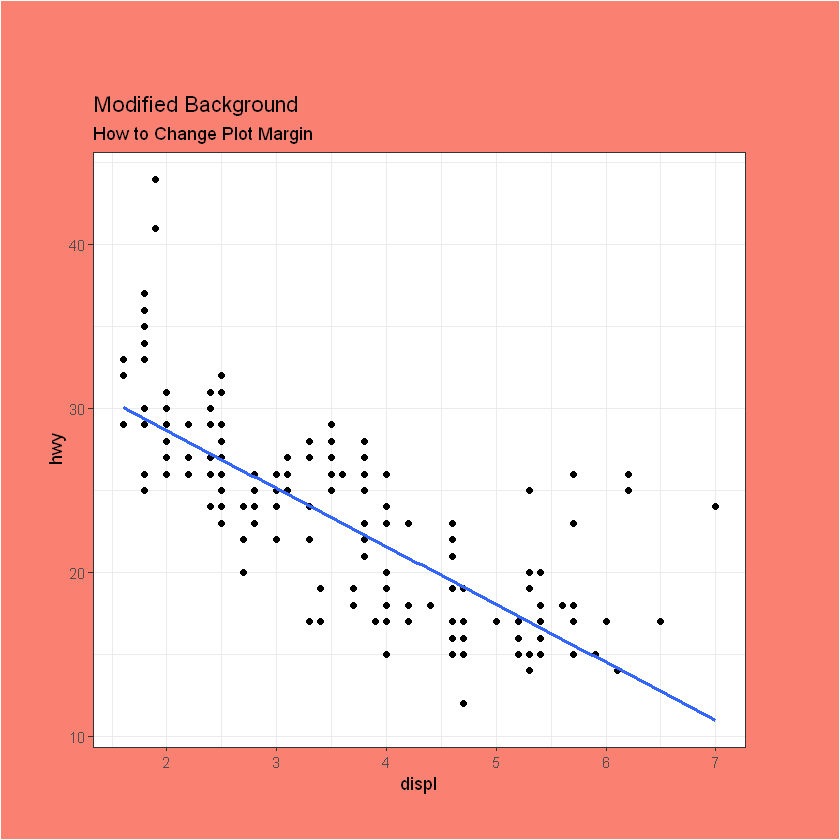

In [30]:
# Change Plot Margins 
g + theme(plot.background=element_rect(fill="salmon"), 
          # top, right, bottom, left
          # 设置图像边缘
          plot.margin = unit(c(2, 2, 1, 1), "cm")) +
labs(title="Modified Background", subtitle="How to Change Plot Margin")  

### 6.2 如何删除主要和次要网格，更改边框，轴标题，文本和标题(How to Remove Major and Minor Grid, Change Border, Axis Title, Text and Ticks）

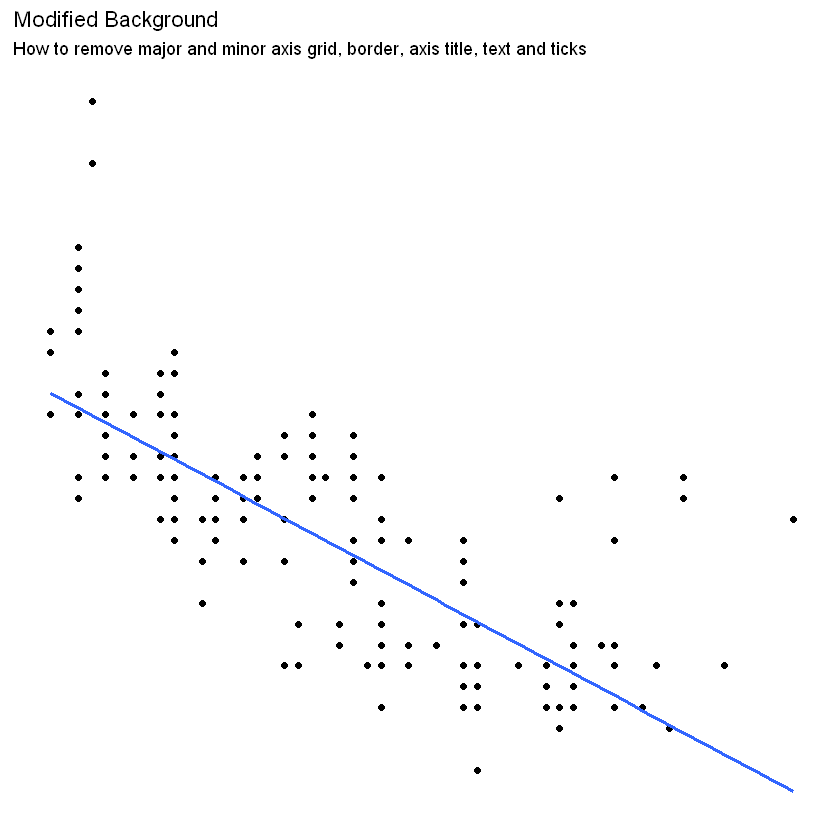

In [31]:
library(ggplot2)

# Base Plot
# 基础绘图
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
geom_point() + 
geom_smooth(method="lm", se=FALSE) + 
theme_bw()

g + theme(
    # 主网格空白
    panel.grid.major = element_blank(), 
    # 次网格空白
    panel.grid.minor = element_blank(), 
    # 边缘空白
    panel.border = element_blank(),
    # 标题空白
    axis.title = element_blank(), 
    # 轴文字空白
    axis.text = element_blank(),
    axis.ticks = element_blank()) +

labs(title="Modified Background", subtitle="How to remove major and minor axis grid, border, axis title, text and ticks") 

### 6.3 主题组件的继承结构(Inheritance Structure of Theme Components)
![img](http://r-statistics.co/screenshots/ggplot_tutorial_customize_theme_29.png)